## PFSA

In [19]:
import pandas as pd
from pathlib import Path
import json
import re

pd.set_option("display.max_rows", 500)

df = pd.read_csv(
    "/home/agiats/Projects/lm_inductive_bias/results/local_entropy_disjoint_collected_results.csv"
)
(
    "topology",
    df["topology_seed"].nunique(),
    "weight",
    df["weight_seed"].nunique(),
    "n_states",
    df["n_states"].nunique(),
    "N_sym",
    df["N_sym"].nunique(),
)

('topology', 5, 'weight', 10, 'n_states', 1, 'N_sym', 1)

## entropy distribution of PFSA

/home/agiats/Projects/lm_inductive_bias/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/agiats/Projects/lm_inductive_bias/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_993464/3445348491.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['2-local Entropy', '3-local Entropy', '4-local Entropy', '5-local Entropy'], fontsize=12, color='black')
/tmp/ipykernel_993464/3445348491.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Gl

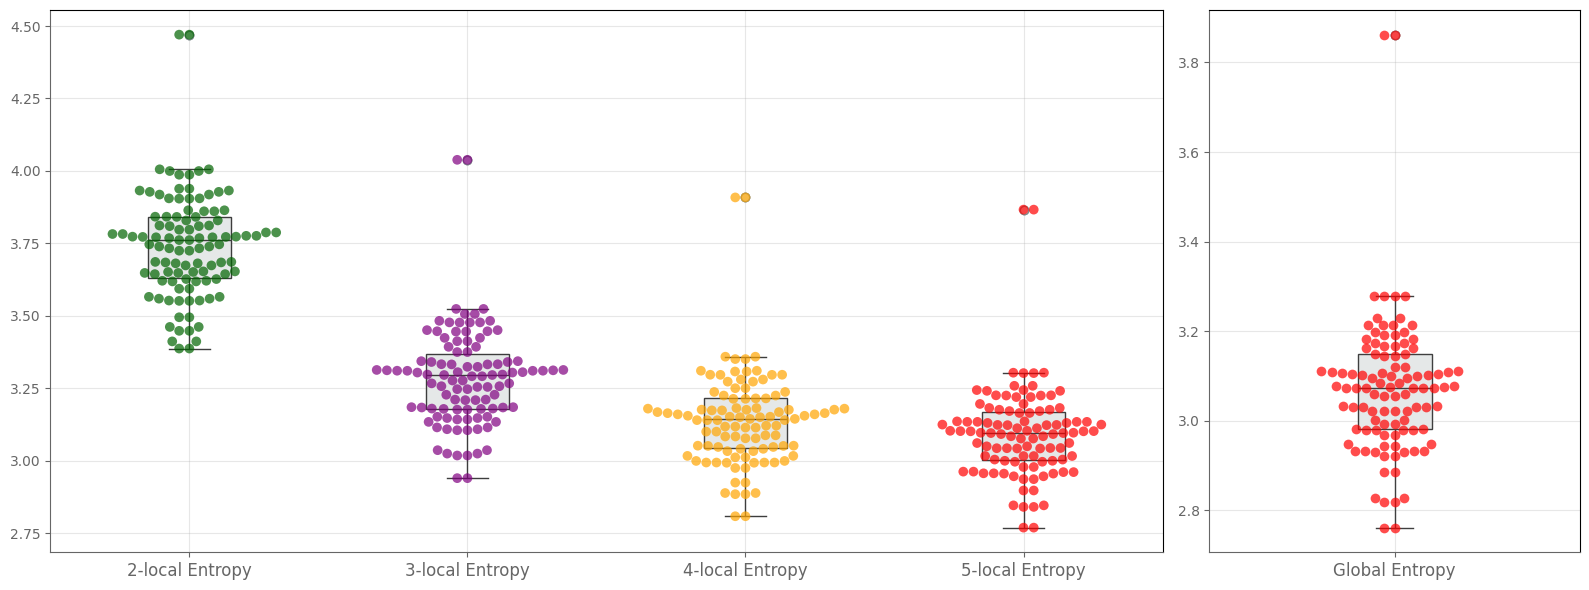


Local Entropy Statistics:
       2_local_entropy  3_local_entropy  4_local_entropy  5_local_entropy
count          102.000          102.000          102.000          102.000
mean             3.745            3.287            3.141            3.095
std              0.184            0.172            0.164            0.161
min              3.387            2.940            2.808            2.769
25%              3.631            3.179            3.043            3.001
50%              3.761            3.296            3.144            3.097
75%              3.842            3.367            3.215            3.170
max              4.470            4.038            3.909            3.867

Global Entropy Statistics:
       next_symbol_entropy
count              102.000
mean                 3.075
std                  0.160
min                  2.761
25%                  2.981
50%                  3.074
75%                  3.149
max                  3.862


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# データの準備
local_entropy_cols = [f"{m}_local_entropy" for m in [2, 3, 4, 5]]

# Figure with two subplots with different widths (gridspec_kw)
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(16, 6), gridspec_kw={"width_ratios": [3, 1]}
)

# カラーパレットの設定
colors = ["darkgreen", "purple", "orange", "red"]  # 上のプロットのcolor_mapに合わせる
box_color = "#E5E8E8"

# Local entropy plot
ax1.set_xlim(-0.01, len(local_entropy_cols) - 0.01)
sns.boxplot(
    data=df[local_entropy_cols],
    width=0.3,
    color=box_color,
    flierprops={
        "marker": "o",
        "markerfacecolor": box_color,
        "markeredgecolor": "#7F8C8D",
    },
    ax=ax1,
)
sns.swarmplot(data=df[local_entropy_cols], size=7, palette=colors, alpha=0.7, ax=ax1)

# Global entropy plot
ax2.set_xlim(-0.1, 0.1)
sns.boxplot(
    data=df[["next_symbol_entropy"]],
    width=0.2,
    color=box_color,
    flierprops={
        "marker": "o",
        "markerfacecolor": box_color,
        "markeredgecolor": "#7F8C8D",
    },
    ax=ax2,
)
sns.swarmplot(
    data=df[["next_symbol_entropy"]],
    size=7,
    color="red",
    alpha=0.7,
    ax=ax2,
    label="Global Entropy",
)  # 赤色を使用

# Customize first subplot
# ax1.set_title('Distribution of Local Entropy Values', fontsize=16)
# ax1.set_xlabel('Local Entropy Type', fontsize=14)
# ax1.set_ylabel('Local Entropy', fontsize=14)
ax1.set_xticklabels(
    ["2-local Entropy", "3-local Entropy", "4-local Entropy", "5-local Entropy"],
    fontsize=12,
    color="black",
)
ax1.grid(True, alpha=0.3)

# Customize second subplot
# ax2.set_title('Distribution of Global Entropy', fontsize=16)
# ax2.set_xlabel('Global Entropy', fontsize=14)
# ax2.set_ylabel('Global Entropy', fontsize=14)
ax2.set_xticklabels(["Global Entropy"], fontsize=12)
ax2.grid(True, alpha=0.3)

# Common styling
for ax in [ax1, ax2]:
    ax.spines["bottom"].set_color("#666666")
    ax.spines["left"].set_color("#666666")
    ax.tick_params(colors="#666666")

plt.tight_layout()
plt.show()

# 基本統計量を表示
print("\nLocal Entropy Statistics:")
print(df[local_entropy_cols].describe().round(3))
print("\nGlobal Entropy Statistics:")
print(df[["next_symbol_entropy"]].describe().round(3))

## Model performance

In [21]:
df["KL_divergence"] = df["cross_entropy_per_token_base_2"] - df["next_symbol_entropy"]
df.head()

,grammar_name,trial,architecture,n_states,N_sym,topology_seed,weight_seed,mean_length,entropy,next_symbol_entropy,2_local_entropy,3_local_entropy,4_local_entropy,5_local_entropy,cross_entropy_per_token,perplexity,cross_entropy_per_token_base_e,cross_entropy_per_token_base_2,KL_divergence
0,Q8_S32_ts3_ws8,0,lstm,8,32,3,8,40.0,122.165746,2.979652,3.643955,3.176322,3.047444,3.003972,2.056910,7.821766,2.056910,2.967494,-0.012158
1,Q8_S32_ts4_ws4,0,lstm,8,32,4,4,40.0,115.525263,2.817689,3.448204,3.036362,2.888529,2.845912,1.933835,6.915984,1.933835,2.789934,-0.027755
2,Q8_S32_ts3_ws1,0,lstm,8,32,3,1,40.0,120.121683,2.929797,3.651382,3.179927,3.011694,2.955509,2.015525,7.504669,2.015525,2.907789,-0.022009
3,Q8_S32_ts1_ws3,0,lstm,8,32,1,3,40.0,125.982678,3.072748,3.653332,3.246955,3.121051,3.084414,2.107763,8.229809,2.107763,3.040859,-0.031889
4,Q8_S32_ts1_ws8,0,lstm,8,32,1,8,40.0,120.240895,2.932705,3.620969,3.142416,2.999252,2.956541,2.022631,7.558185,2.022631,2.918040,-0.014665


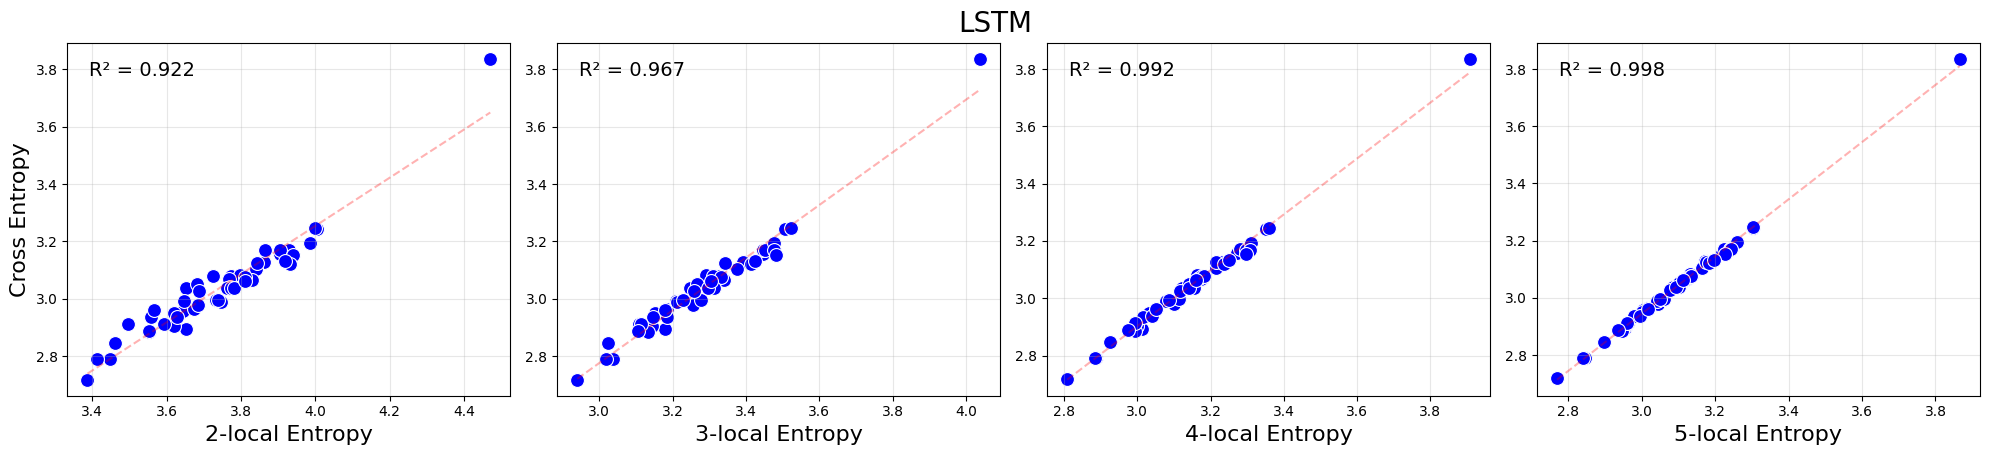

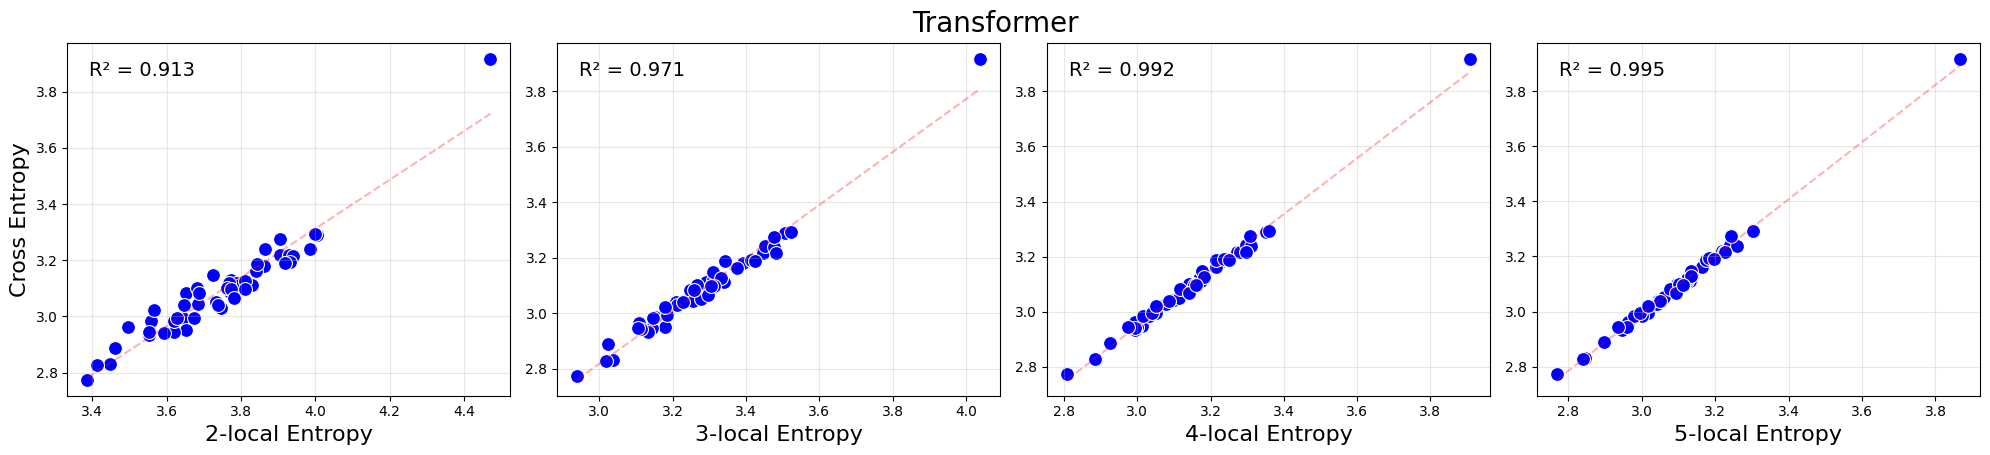

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


ms = [
    int(col.replace("_local_entropy", ""))
    for col in df.columns
    if (col.endswith("_local_entropy") and not col.startswith("estimated_"))
]

architecture_map = {
    "lstm": "LSTM",
    "transformer": "Transformer",
    "transformer_tiny": "Transformer (Small)",
    "transformer_4layer": "Transformer",
}

for architecture in df["architecture"].unique():
    # モデルごとのデータを取得
    model_data = df[df["architecture"] == architecture]

    # サブプロットの作成
    fig, axes = plt.subplots(1, len(ms), figsize=(5 * len(ms), 5))

    for i, m in enumerate(ms):
        for trial_i in model_data["trial"].unique():
            sns.scatterplot(
                data=model_data[model_data["trial"] == trial_i],
                x=f"{m}_local_entropy",
                y="cross_entropy_per_token_base_2",
                ax=axes[i],
                s=100,
                color="blue",
            )

        # Add regression line
        x = model_data[f"{m}_local_entropy"]
        y = model_data["cross_entropy_per_token_base_2"]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        line_x = np.array([x.min(), x.max()])
        line_y = slope * line_x + intercept
        axes[i].plot(line_x, line_y, color="red", linestyle="--", alpha=0.3)

        # Add R² value
        r_squared = r_value**2
        axes[i].text(
            0.05,
            0.95,
            f"R² = {r_squared:.3f}",
            transform=axes[i].transAxes,
            verticalalignment="top",
            fontsize=14,
        )

        axes[i].set_xlabel(f"{m}-local Entropy", fontsize=16)
        axes[i].set_ylabel("Cross Entropy" if i == 0 else "", fontsize=16)
        axes[i].grid(True, alpha=0.3)

    plt.suptitle(f"{architecture_map[architecture]}", fontsize=20, y=0.9)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

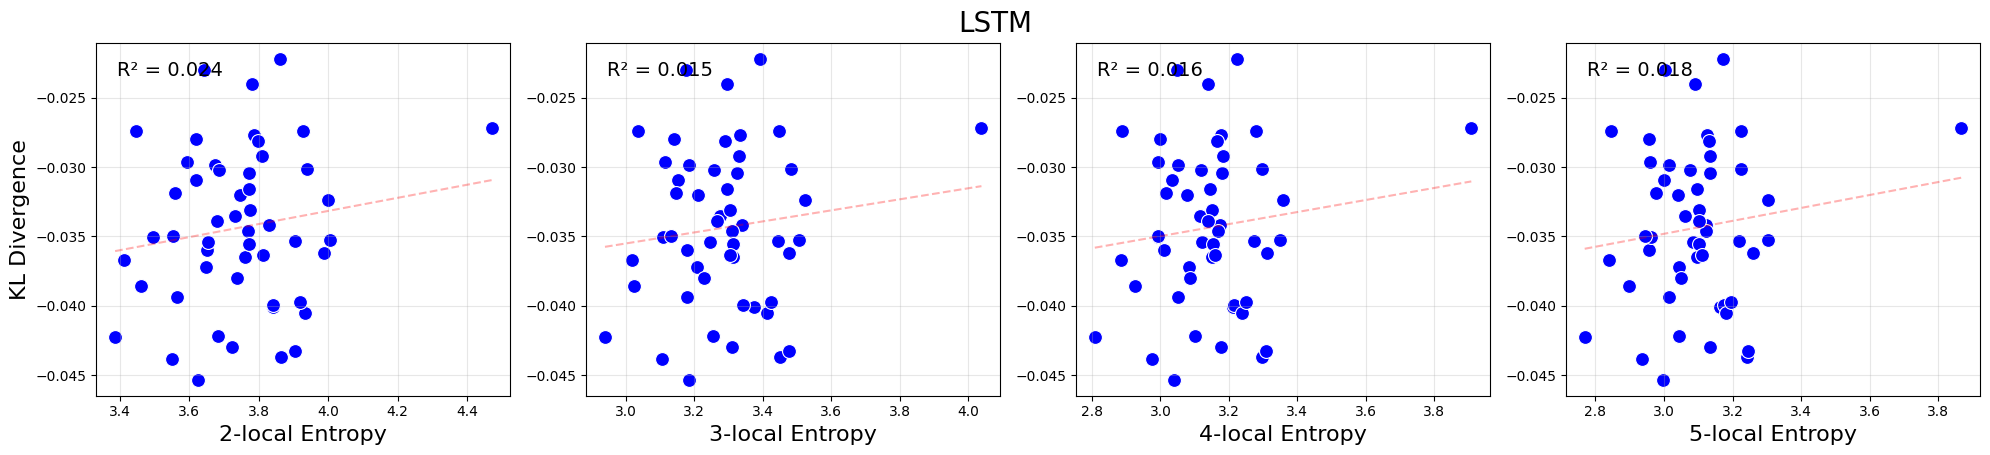

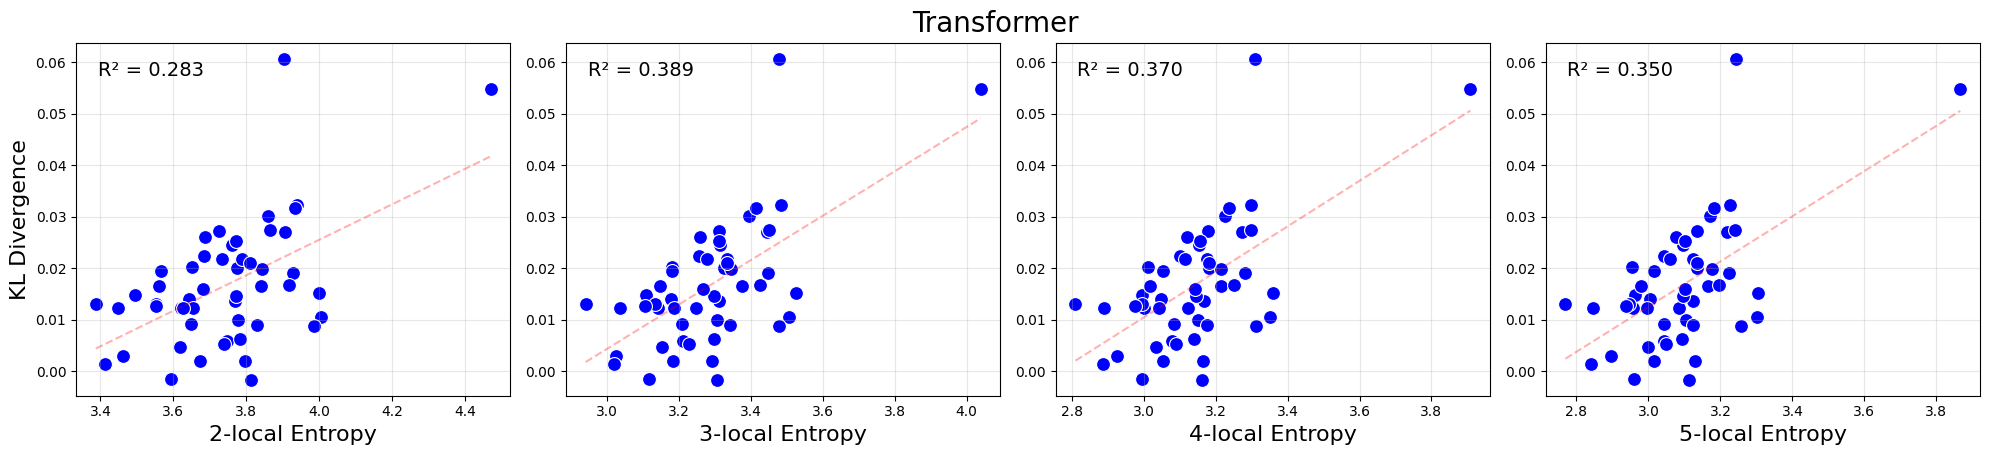

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


ms = [
    int(col.replace("_local_entropy", ""))
    for col in df.columns
    if (col.endswith("_local_entropy") and not col.startswith("estimated_"))
]

architecture_map = {
    "lstm": "LSTM",
    "transformer": "Transformer",
    "transformer_tiny": "Transformer (Small)",
    "transformer_4layer": "Transformer",
}

for architecture in df["architecture"].unique():
    # モデルごとのデータを取得
    model_data = df[df["architecture"] == architecture]

    # サブプロットの作成
    fig, axes = plt.subplots(1, len(ms), figsize=(5 * len(ms), 5))

    for i, m in enumerate(ms):
        for trial_i in model_data["trial"].unique():
            sns.scatterplot(
                data=model_data[model_data["trial"] == trial_i],
                x=f"{m}_local_entropy",
                y="KL_divergence",
                ax=axes[i],
                s=100,
                color="blue",
            )

        # Add regression line
        x = model_data[f"{m}_local_entropy"]
        y = model_data["KL_divergence"]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        line_x = np.array([x.min(), x.max()])
        line_y = slope * line_x + intercept
        axes[i].plot(line_x, line_y, color="red", linestyle="--", alpha=0.3)

        # Add R² value
        r_squared = r_value**2
        axes[i].text(
            0.05,
            0.95,
            f"R² = {r_squared:.3f}",
            transform=axes[i].transAxes,
            verticalalignment="top",
            fontsize=14,
        )

        axes[i].set_xlabel(f"{m}-local Entropy", fontsize=16)
        axes[i].set_ylabel("KL Divergence" if i == 0 else "", fontsize=16)
        axes[i].grid(True, alpha=0.3)

    plt.suptitle(f"{architecture_map[architecture]}", fontsize=20, y=0.9)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

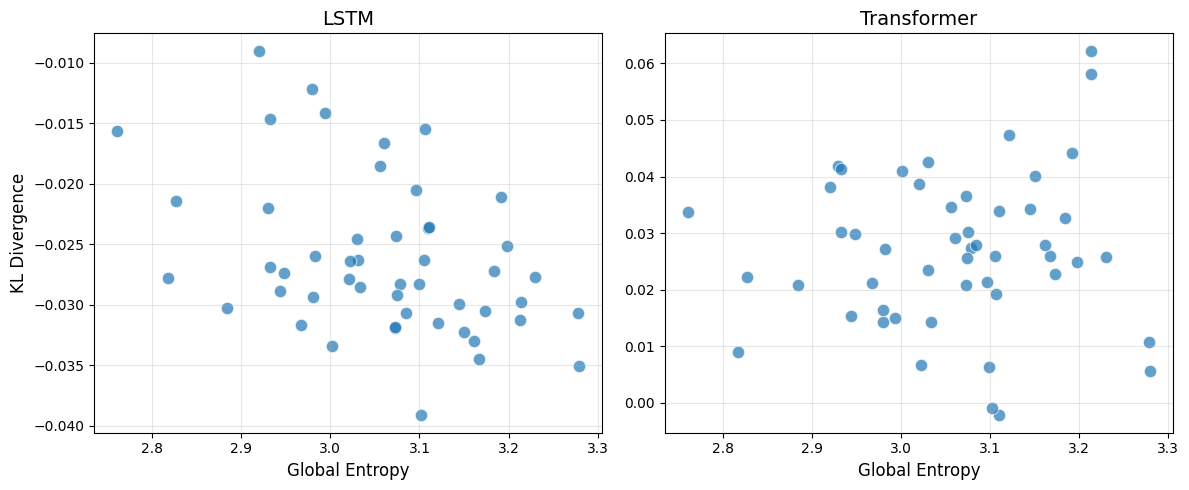

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Figure setup with adjusted size
fig, axes = plt.subplots(1, len(df["architecture"].unique()), figsize=(12, 5))

# Plot for each architecture
for i, arch in enumerate(df["architecture"].unique()):
    arch_data = df[df["architecture"] == arch]

    sns.scatterplot(
        data=arch_data,
        x="next_symbol_entropy",
        y="KL_divergence",
        s=80,  # ポイントサイズも少し小さく
        alpha=0.7,
        ax=axes[i],
    )

    # Customize each subplot
    axes[i].set_xlabel("Global Entropy", fontsize=12)
    axes[i].set_ylabel("KL Divergence" if i == 0 else "", fontsize=12)
    axes[i].set_title(architecture_map[arch], fontsize=14)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

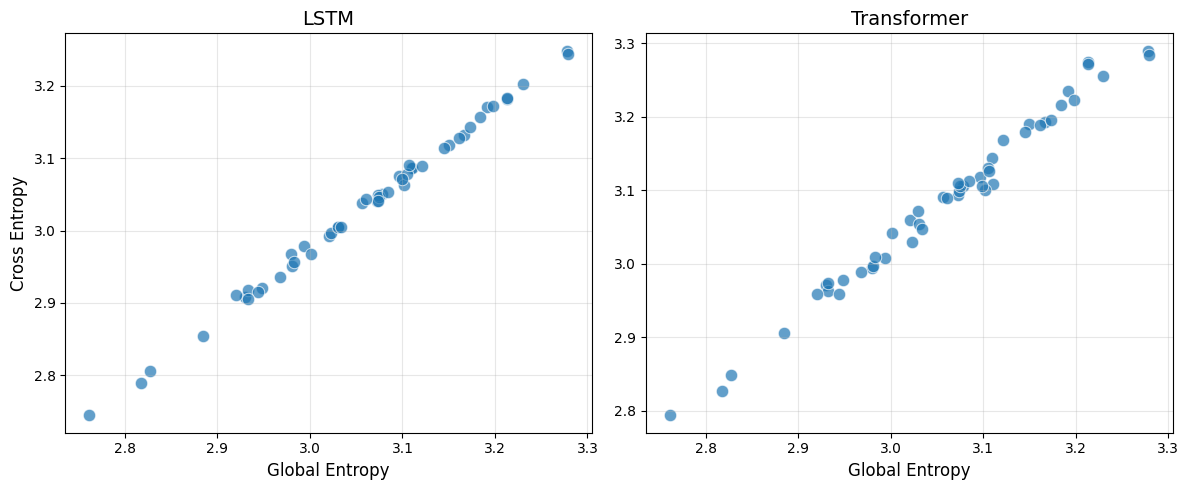

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Figure setup with adjusted size
fig, axes = plt.subplots(1, len(df["architecture"].unique()), figsize=(12, 5))

# Plot for each architecture
for i, arch in enumerate(df["architecture"].unique()):
    arch_data = df[df["architecture"] == arch]

    sns.scatterplot(
        data=arch_data,
        x="next_symbol_entropy",
        y="cross_entropy_per_token_base_2",
        s=80,  # ポイントサイズも少し小さく
        alpha=0.7,
        ax=axes[i],
    )

    # Customize each subplot
    axes[i].set_xlabel("Global Entropy", fontsize=12)
    axes[i].set_ylabel("Cross Entropy" if i == 0 else "", fontsize=12)
    axes[i].set_title(architecture_map[arch], fontsize=14)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()